In [13]:
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
import sklearn
import numpy as np

iris = datasets.load_iris()
gnb = GaussianNB()

# First DataSet

(2, 200)
(1, 200)


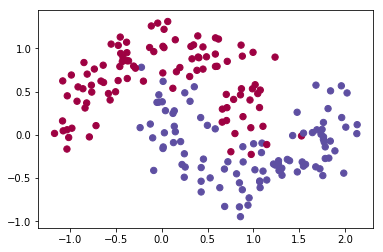

In [20]:
# load dataset
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

print(X.shape)
print(Y.shape)

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

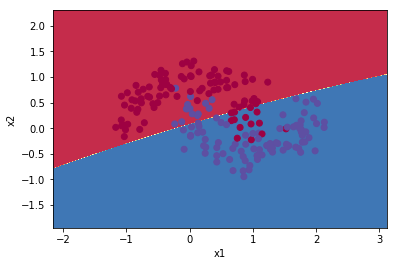

Number of mislabeled points out of a total 200 points : 27


In [21]:
model = gnb.fit(X.T, Y[0])
y_pred = model.predict(X.T)

plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.show()
print("Number of mislabeled points out of a total %d points : %d" % (X.T.shape[0], (Y[0] != y_pred).sum()))

c:\users\jeremy\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


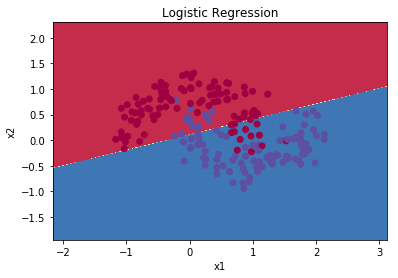

Accuracy of logistic regression: 87 % (percentage of correctly labelled datapoints)


In [22]:
# simple logistic regression
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

# Plot the decision boundary for logistic regression
plt.title("Logistic Regression")
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.show()

# Print accuracy
LR_predictions = clf.predict(X.T)

print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

# Second Dataset

In [23]:
X, Y = load_planar_dataset()
print(X.shape)
print(Y.shape)
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

(2, 400)
(1, 400)


Number of mislabeled points out of a total 400 points : 211


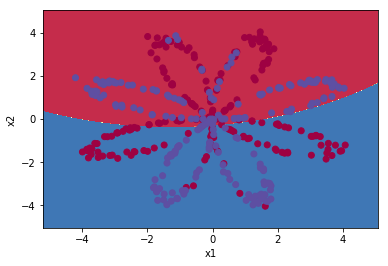

In [24]:
gnb = GaussianNB()
model = gnb.fit(X.T, Y[0])
y_pred = model.predict(X.T)

print("Number of mislabeled points out of a total %d points : %d" % (X.T.shape[0], (Y[0] != y_pred).sum()))
plot_decision_boundary(lambda x: model.predict(x), X, Y)
plt.show()

c:\users\jeremy\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


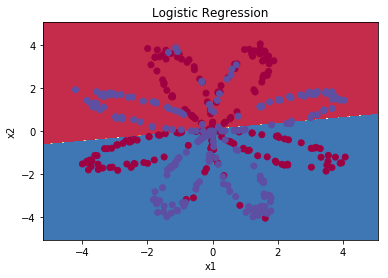

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


In [25]:
# simple logistic regression
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, Y.T);

# Plot the decision boundary for logistic regression
plt.title("Logistic Regression")
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.show()

# Print accuracy
LR_predictions = clf.predict(X.T)

print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

# Third Dataset: IRIS

In [5]:
print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
print(iris.DESCR)

dict_keys(['data', 'feature_names', 'DESCR', 'target_names', 'target'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76 

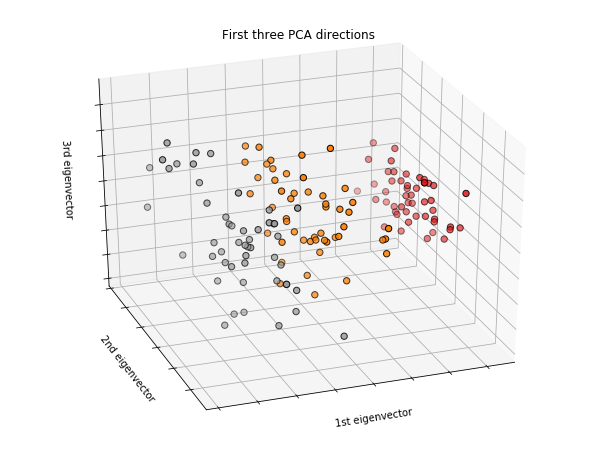

In [1]:
# description
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [20]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
y_pred = gnb.fit(iris.data, iris.target).predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


In [28]:
# simple logistic regression
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X, Y[0]);

# Plot the decision boundary for logistic regression
plt.title("Logistic Regression")
plot_decision_boundary(lambda x: clf.predict(x), X.T, Y[0])
plt.show()

# Print accuracy
LR_predictions = clf.predict(X)

print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

ValueError: Found input variables with inconsistent numbers of samples: [150, 400]

In [33]:
iris.data
iris.data.shape

(150, 4)

In [34]:
iris.target
iris.target.shape

(150,)